# Investigating regression - both enantiomer data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns

sns.set(rc={'figure.figsize': (5, 5)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_theme()
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_pickle('ActiveSiteSeqs SeqVec.pkl')
df.reset_index(inplace=True)
df.head(2)

,index,IRED No.,Reaction 2,ee,Enantiomer,enantiomer binary,Sequence,ActiveSiteSequence,CofactorSiteSequence,ActiveSiteCharge,NumOfAcidicRes,NumOfBasicRes,NumOfHisRes,AllActiveSiteRes,embedding,em_per_protein
0,0,1,"62% (33% ee, S)",33.0,S,1.0,MSTKKVTVIGLGSLGSALAAALLRTGHDVTVWNRTPEKAEALVAQG...,WGMYASSINVALILSAVMAVPADLLLYGYL,WMASSIVAKIGLGSLGSALWNRTPEKVVCVFDTEAARELLNLTSGG...,-1.0,1.0,0.0,0.0,"[('204', 'TRP'), ('207', 'GLY'), ('208', 'MET'...","[[[0.16993958, -0.03258724, 0.05482708, -0.085...","[0.040156763, -0.117751405, -0.030865876, 0.09..."
1,1,2,"67% (46% ee, S)",46.0,S,1.0,MTDTSAKLTLLGLGAMGSALATAWLAADYDITVWNRTASRAEPLRT...,WAMYTSNMMEGNMTMTGIMAVPPMDVLLSMTF,WTSNMEGTLLGLGAMGSALWNRTASRAACLLDDASVSTLNLTTGGG...,-2.0,2.0,0.0,0.0,"[('209', 'TRP'), ('212', 'ALA'), ('213', 'MET'...","[[[0.16993958, -0.032587238, 0.05482708, -0.08...","[0.05249873, -0.11437141, -0.12927642, -0.0184..."


In [3]:
new_ee = []
for i in range(0, 205):
    ee = df['ee'].loc[i]
    if df.loc[i].iat[4] == 'R':
        new_ee_value = -ee
    else:
        new_ee_value = ee
    new_ee.append(new_ee_value)

In [4]:
df['ee'] = new_ee
df

,index,IRED No.,Reaction 2,ee,Enantiomer,enantiomer binary,Sequence,ActiveSiteSequence,CofactorSiteSequence,ActiveSiteCharge,NumOfAcidicRes,NumOfBasicRes,NumOfHisRes,AllActiveSiteRes,embedding,em_per_protein
0,0,1,"62% (33% ee, S)",33.0,S,1.0,MSTKKVTVIGLGSLGSALAAALLRTGHDVTVWNRTPEKAEALVAQG...,WGMYASSINVALILSAVMAVPADLLLYGYL,WMASSIVAKIGLGSLGSALWNRTPEKVVCVFDTEAARELLNLTSGG...,-1.0,1.0,0.0,0.0,"[('204', 'TRP'), ('207', 'GLY'), ('208', 'MET'...","[[[0.16993958, -0.03258724, 0.05482708, -0.085...","[0.040156763, -0.117751405, -0.030865876, 0.09..."
1,1,2,"67% (46% ee, S)",46.0,S,1.0,MTDTSAKLTLLGLGAMGSALATAWLAADYDITVWNRTASRAEPLRT...,WAMYTSNMMEGNMTMTGIMAVPPMDVLLSMTF,WTSNMEGTLLGLGAMGSALWNRTASRAACLLDDASVSTLNLTTGGG...,-2.0,2.0,0.0,0.0,"[('209', 'TRP'), ('212', 'ALA'), ('213', 'MET'...","[[[0.16993958, -0.032587238, 0.05482708, -0.08...","[0.05249873, -0.11437141, -0.12927642, -0.0184..."
2,2,3,"36%, (35% ee, S)",35.0,S,1.0,MSKHISIFGLGAMGAALAARYLEHGYKTTVWNRTTAKATPLVEQGA...,WAMYGSNMQVGVNIMLNGIMAVPMDLLLSMYF,WGSNMVGNIFGLGAMGAALWNRTTAKIICLLNNEAAEDILNLTNGH...,-1.0,1.0,0.0,0.0,"[('208', 'TRP'), ('211', 'ALA'), ('212', 'MET'...","[[[0.16993958, -0.032587238, 0.05482708, -0.08...","[0.04974047, -0.22189598, -0.09539266, 0.04158..."
3,3,4,"97% (35% ee, S)",35.0,S,1.0,MSTITLFGLGAMGKALAAKYIEKGYTTTIWNRTPSKAAPLVEKGAK...,WAMYGSNMQTGVIVMLNGIMAVPMDLLLSMYF,WMGSNMTGNLFGLGAMGKALWNRTPSKVLCLLDNASVRQTLNLTNG...,-1.0,1.0,0.0,0.0,"[('207', 'TRP'), ('210', 'ALA'), ('211', 'MET'...","[[[0.16993958, -0.032587238, 0.05482708, -0.08...","[0.050968174, -0.15954444, -0.06755629, 0.0511..."
4,5,6,"99% (75% ee, S)",75.0,S,1.0,MPESTTPSTATPVTIIGLGAMGTALANAFLDAGHSTTVWNRTAARA...,WGMSYVVSNMQAGFNVMLNGIMAIPPDLLLTMYF,WMVVSNMAGNIGLGAMGTALWNRTAARVACVLDYDAFHETLNLTNG...,-1.0,1.0,0.0,0.0,"[('214', 'TRP'), ('217', 'GLY'), ('218', 'MET'...","[[[0.16993958, -0.032587238, 0.05482708, -0.08...","[0.11215482, -0.08766593, -0.07720768, -0.0253..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,371,373,"22% (83% ee, R)",-83.0,R,0.0,MTSHAEHSAVTVLGLGPMGRALANAFLDAGLRTTVWNRTPGRDREL...,GTILIDNPSASSMIMVNYAIMTPTTDILLDFWM,IDNPSSSHLGLGPMGRALWNRTPGRPVCVVNYDAADAIVRRNLTAD...,-3.0,3.0,0.0,0.0,"[('213', 'GLY'), ('216', 'THR'), ('217', 'ILE'...","[[[0.085892625, -0.0036075087, -0.070934206, -...","[0.069881365, -0.1693138, -0.015431341, -0.027..."
201,372,374,"97% (>99% ee, S)",99.0,S,1.0,MSSVSIFGLGAMGTAMAARFLEKNFKVTVWNRTPEKANKLLDKGAS...,WAMYGSNMQVAINIMLNGIMATPMDLLLSMYF,WMGSNMVANFGLGAMGTAMWNRTPEKAVVCLLDNAAVQTTFNLTNG...,-1.0,1.0,0.0,0.0,"[('204', 'TRP'), ('207', 'ALA'), ('208', 'MET'...","[[[0.16993958, -0.032587238, 0.05482708, -0.08...","[0.027619984, -0.15312919, -0.069119304, 0.042..."
202,374,377,"8% (>99% ee, S)",99.0,S,1.0,MSEKIAFLGLGNLGYPIAESLINSGFDVTVWNRTASKADPLVKLGA...,TAAFYAFRLGKDILTLTPIFARPAKLGNFIAL,AFRLKDLFLGLGNLGYPIWNRTASKAPSVIADDAGLEELFSMSTIA...,3.0,1.0,4.0,0.0,"[('209', 'THR'), ('212', 'ALA'), ('213', 'ALA'...","[[[-0.015178924, -0.018431097, -0.059588823, -...","[-0.10413252, 0.006960922, -0.017046625, -0.03..."
203,379,382,2% (S),2.0,S,1.0,MLKAGHPTTIWNRSPGKGEDLVARGATRAATPAEAVRAGEVVVVCV...,HLLLEANMEEGIIWVSVMIPTMDLMLDFWM,HEANMEGHIWNRSPGKPVCVVDYEASQSILNVTSDGAVMIPTVILL...,-5.0,5.0,0.0,1.0,"[('187', 'HIS'), ('190', 'LEU'), ('191', 'LEU'...","[[[0.00084215496, 0.016219497, -0.050990734, 0...","[0.00584877, -0.04620752, -0.1307622, -0.10487..."


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (5, 5)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_theme()
%config InlineBackend.figure_format = 'retina'

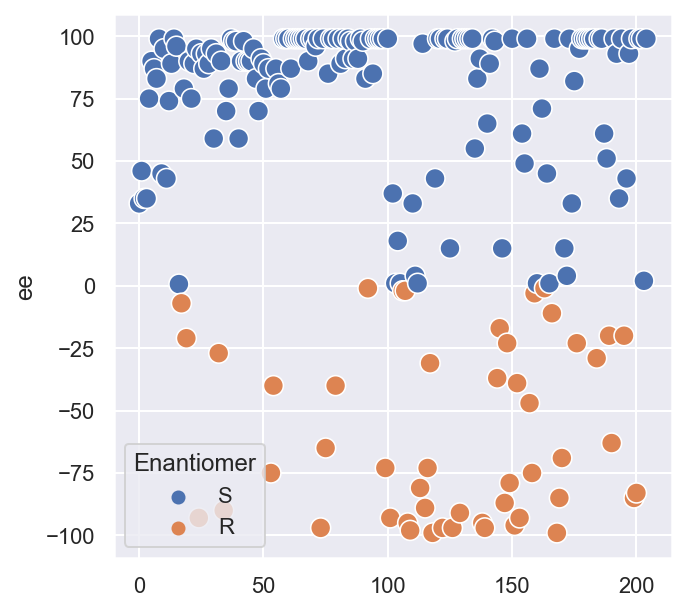

In [6]:
ax = sns.scatterplot(data=df, x=df.index, y='ee', hue='Enantiomer', s=100)

In [7]:
X = list(df['em_per_protein'])
y = df['ee']

SEED=25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [8]:
# Linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_mse = mean_squared_error(y_test, y_pred)
reg_r2_score = r2_score(y_test, y_pred)

reg_metrics = {'Linear regression':[reg_mse, reg_r2_score]}

full_sequence = pd.DataFrame(reg_metrics, index=['Mean squared error', 'r2 score'])

# Ridge regression model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2_score = r2_score(y_test, y_pred_ridge)
ridge_scores = [ridge_mse, ridge_r2_score]
full_sequence['Ridge'] = ridge_scores

# Lasso regression model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2_score = r2_score(y_test, y_pred_lasso)
lasso_scores = [lasso_mse, lasso_r2_score]

full_sequence['Lasso'] = lasso_scores

## Using active site sequence data

In [9]:
as_df = pd.read_pickle('Active site and cofactor seqs.pkl')
as_df.set_index('IRED No. ', inplace=True)

In [10]:
X = list(as_df['as_em_per_protein'])
y = as_df['ee']

SEED=25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

# Linear regression model
reg_as = LinearRegression()
reg_as.fit(X_train, y_train)

y_pred_as = reg_as.predict(X_test)
reg_as_mse = mean_squared_error(y_test, y_pred_as)
reg_as_r2 = r2_score(y_test, y_pred_as)

reg_as_metrics = {'Linear regression':[reg_as_mse, reg_as_r2]}
active_site = pd.DataFrame(reg_as_metrics, index=['Mean squared error', 'r2 score'])

# Ridge regression model
ridge_as = Ridge(alpha=1.0)

ridge_as.fit(X_train, y_train)

y_pred_ridge_as = ridge_as.predict(X_test)
ridge_as_mse = mean_squared_error(y_test, y_pred_ridge_as)
ridge_as_r2 = r2_score(y_test, y_pred_ridge_as)

ridge_as_scores = [ridge_as_mse, ridge_as_r2]
active_site['Ridge'] = ridge_as_scores

# Lasso regression model
lasso_as = Lasso(alpha=0.2)

lasso_as.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_lasso_as = lasso_as.predict(X_test)

# The mean squared error
lasso_as_mse = mean_squared_error(y_test, y_pred_lasso_as)
# The coefficient of determination: 1 is perfect prediction
lasso_as_r2 = r2_score(y_test, y_pred_lasso_as)

lasso_as_scores = [lasso_as_mse, lasso_as_r2]
active_site['Lasso'] = lasso_as_scores

In [11]:
active_site

,Linear regression,Ridge,Lasso
Mean squared error,2040.012649,1015.904459,975.006625
r2 score,-1.037238,-0.014523,0.026320


In [12]:
full_sequence

,Linear regression,Ridge,Lasso
Mean squared error,4054.353617,3568.969104,3413.723086
r2 score,0.226535,0.319134,0.348751
